In [1]:
# @title Example 1: Query a table with SQL and magic commands
# Running this code will query a table in BigQuery and download
# the results to a Pandas DataFrame named `results`.
# Learn more here: https://cloud.google.com/bigquery/docs/visualize-jupyter

%%bigquery results --project mentorship-tolga-fernando-ds
SELECT * FROM `mentorship-tolga-fernando-ds.Global_Development_Indexes.Combined_Development_and_Depression` #this table name was set based on the table you chose to query

Query is running:   0%|          |

Downloading:   0%|          |

In [ ]:
# Importando as bibliotecas necessárias
import bigframes.pandas as bf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Certifique-se de que estas linhas de importação estejam no início do seu script


In [ ]:
# You can view the resulting Pandas DataFrame and work with using the Pandas library.
# https://pandas.pydata.org/docs/getting_started/index.html#getting-started
results

,Country,HDI,LifeExpectancy,ExpectedSchooling,MeanSchooling,GNIPerCapita,GNIRankMinusHDIRank,Median_Happiness_Index_10Years,Male_Depressive_disorders_percentage_of_population_Age_standardized,Female_Depressive_disorders_percentage_of_population_Age_standardized
0,Dominica,720.0,72.8,13.3,8.1,11.49,0.0,NaN,2.235443,3.732815
1,Italy,895.0,82.9,16.2,10.7,42.84,0.0,6.12,2.587289,4.716397
2,Guinea-Bissau,483.0,59.7,10.6,3.6,1.91,0.0,NaN,3.303535,5.462438
3,Mozambique,446.0,59.3,10.2,3.2,1.20,2.0,4.79,4.146026,5.589381
4,Haiti,535.0,63.2,9.7,5.6,2.85,2.0,3.67,2.602208,4.604925
...,...,...,...,...,...,...,...,...,...,...
166,Cuba,764.0,73.7,14.4,12.5,7.88,37.0,NaN,2.973200,5.090788
167,Qatar,855.0,79.3,12.6,10.0,87.13,-39.0,6.38,3.663642,5.281675
168,Botswana,693.0,61.1,12.3,10.3,16.20,-43.0,3.54,3.486289,4.946452
169,Equatorial Guinea,596.0,60.6,9.7,5.9,12.07,-47.0,NaN,4.860204,6.567637


In [ ]:
# @title Example 2: Query a table with BigQuery DataFrames
# With BigQuery DataFrames, you can use many familiar Pandas methods, but the
# processing happens BigQuery rather than the runtime, allowing you to work with larger
# DataFrames that would otherwise not fit in the runtime memory.
# Learn more here: https://cloud.google.com/python/docs/reference/bigframes/latest

import bigframes.pandas as bf

bf.options.bigquery.location = "US" #this variable is set based on the dataset you chose to query
bf.options.bigquery.project = "mentorship-tolga-fernando-ds" #this variable is set based on the dataset you chose to query

In [ ]:
df = bf.read_gbq("mentorship-tolga-fernando-ds.Global_Development_Indexes.Combined_Development_and_Depression") #this variable is set based on the dataset you chose to query

In [ ]:
# BigFrames can work with tables that are too large to fit in the notebook memory.
# Look at the first 20 rows.
df.head(20)

,Country,HDI,LifeExpectancy,ExpectedSchooling,MeanSchooling,GNIPerCapita,GNIRankMinusHDIRank,Median_Happiness_Index_10Years,Male_Depressive_disorders_percentage_of_population_Age_standardized,Female_Depressive_disorders_percentage_of_population_Age_standardized
0,Antigua and Barbuda,788.0,78.5,14.2,9.3,16.79,2.0,<NA>,2.043276,3.708404
1,Mauritius,802.0,73.6,15.2,10.4,22.03,-1.0,5.89,3.057664,5.25024
2,Egypt,731.0,70.2,13.8,9.6,11.73,4.0,4.28,2.849211,4.790112
3,Senegal,511.0,67.1,9.0,2.9,3.34,-10.0,4.66,3.35401,4.531684
4,Guinea-Bissau,483.0,59.7,10.6,3.6,1.91,0.0,<NA>,3.303535,5.462438
5,Lithuania,875.0,73.7,16.3,13.5,37.93,5.0,6.05,3.420707,4.893477
6,Oman,816.0,72.5,14.6,11.7,27.05,-2.0,6.85,3.332522,4.889729
7,San Marino,853.0,80.9,12.3,10.8,52.65,-25.0,<NA>,3.119664,4.980811
8,Malaysia,803.0,74.9,13.3,10.6,26.66,-8.0,5.76,2.999154,3.850248
9,United Kingdom,929.0,80.7,17.3,13.4,45.23,9.0,6.88,3.501368,4.754729


              HDI  LifeExpectancy  ExpectedSchooling  MeanSchooling  \
count       171.0           171.0              171.0          171.0   
mean   723.192982       71.427485          13.566667       9.033918   
std    153.062283          7.6942           2.964158       3.229117   
min         385.0            52.5                5.5            2.1   
25%         596.0            65.7               11.7            6.2   
50%         745.0            71.8               13.5            9.4   
75%         848.0            77.2               15.7           11.6   
max         962.0            84.8               21.1           14.1   

       GNIPerCapita  GNIRankMinusHDIRank  Median_Happiness_Index_10Years  \
count         171.0                171.0                           141.0   
mean      35.106433             0.128655                        5.457447   
std      108.581339            13.858777                        1.112097   
min             1.2                -47.0                

Country                                               0.0
HDI                                                   0.0
LifeExpectancy                                        0.0
ExpectedSchooling                                     0.0
MeanSchooling                                         0.0
GNIPerCapita                                          0.0
GNIRankMinusHDIRank                                   0.0
Median_Happiness_Index_10Years                       30.0
Male_Depressive_disorders_percentage_of_popula...     0.0
Female_Depressive_disorders_percentage_of_popu...     0.0
dtype: Float64


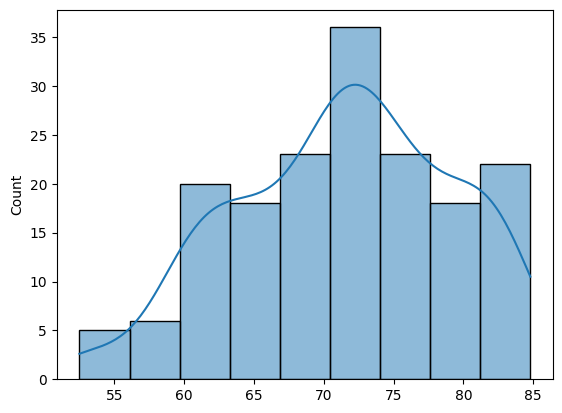

In [ ]:
# Basic descriptive analysis
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

# Visualizing distributions for selected columns
sns.histplot(df['LifeExpectancy'], kde=True)
plt.show()


<ipython-input-11-3df3c2bd2059>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = local_df.corr()


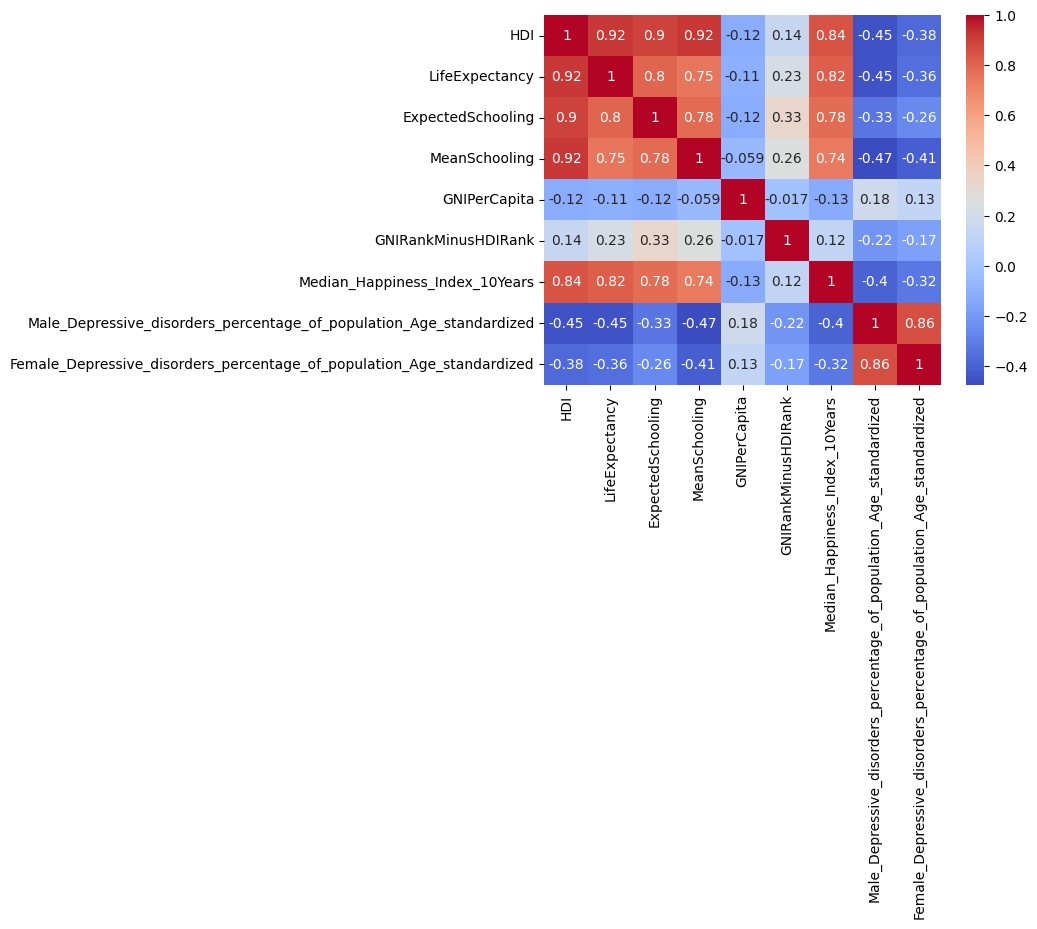

In [ ]:
# Convertendo o BigFrame para um DataFrame Pandas
local_df = df.to_pandas()

# Calculando a matriz de correlação
correlation_matrix = local_df.corr()

# Visualizando a matriz de correlação
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
# Importando bibliotecas para padronização e clusterização
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Selecionando as colunas para a análise de cluster
cols_for_clustering = ['HDI', 'LifeExpectancy', 'ExpectedSchooling', 'MeanSchooling',
                       'GNIPerCapita', 'GNIRankMinusHDIRank',
                       'Median_Happiness_Index_10Years',
                       'Male_Depressive_disorders_percentage_of_population_Age_standardized',
                       'Female_Depressive_disorders_percentage_of_population_Age_standardized']

# Padronizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(results[cols_for_clustering])


In [ ]:
# Removendo linhas com valores NaN
cleaned_data = results.dropna(subset=cols_for_clustering)


In [ ]:
from sklearn.impute import SimpleImputer

# Criando um imputador que substitui NaN pela média
imputer = SimpleImputer(strategy='mean')

# Aplicando o imputador aos dados
scaled_data = imputer.fit_transform(scaled_data)


In [ ]:
# Colunas para análise de cluster
cols_for_clustering = ['HDI', 'LifeExpectancy', 'ExpectedSchooling', 'MeanSchooling',
                       'GNIPerCapita', 'GNIRankMinusHDIRank',
                       'Median_Happiness_Index_10Years',
                       'Male_Depressive_disorders_percentage_of_population_Age_standardized',
                       'Female_Depressive_disorders_percentage_of_population_Age_standardized']


In [ ]:
from sklearn.impute import SimpleImputer

# Criando um imputador que substitui NaN pela média
imputer = SimpleImputer(strategy='mean')

# Aplicando o imputador aos dados
scaled_data = imputer.fit_transform(results[cols_for_clustering])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Padronizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)


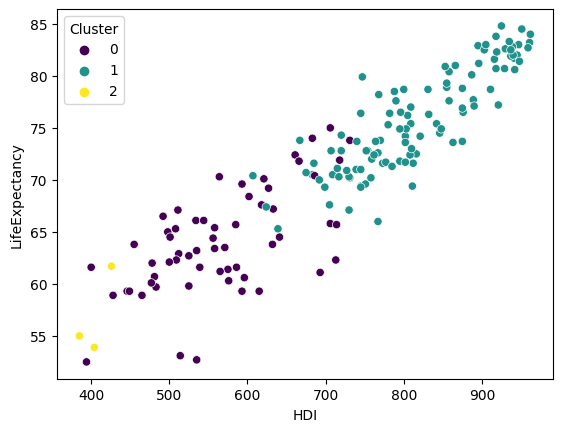

In [ ]:
from sklearn.cluster import KMeans

# Definindo o número de clusters
kmeans = KMeans(n_clusters=3, n_init=10)

# Aplicando K-Means aos dados padronizados
clusters = kmeans.fit_predict(scaled_data)

# Adicionando os rótulos dos clusters ao DataFrame
results['Cluster'] = clusters
import matplotlib.pyplot as plt
import seaborn as sns

# Continuando com o seu código
# ...

# Visualizando os Clusters (usando HDI e LifeExpectancy como exemplo)
sns.scatterplot(data=results, x='HDI', y='LifeExpectancy', hue='Cluster', palette='viridis')
plt.show()


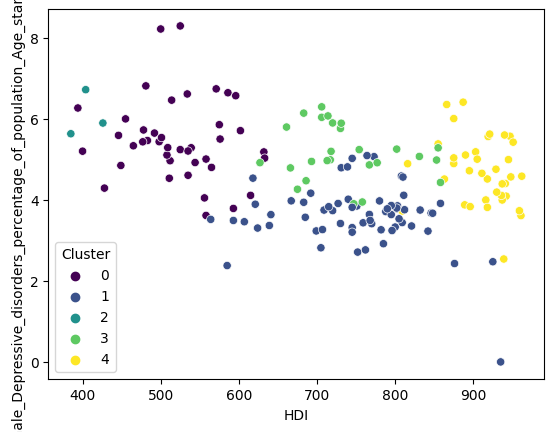

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10)  # Aumentando para 5 clusters e analisando porcentagem feminina x IDH
clusters = kmeans.fit_predict(scaled_data)
results['Cluster'] = clusters

sns.scatterplot(data=results, x='HDI', y=
'Female_Depressive_disorders_percentage_of_population_Age_standardized', hue='Cluster', palette='viridis')
plt.show()


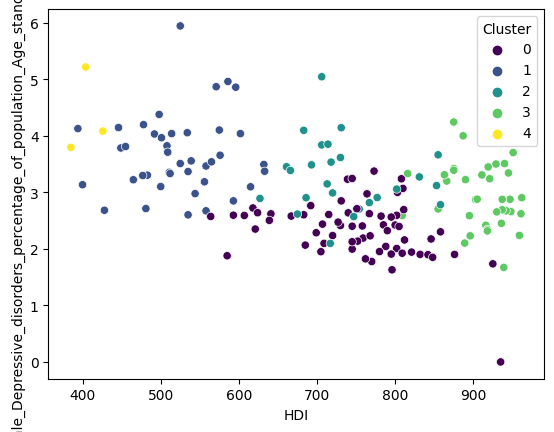

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10)  # Aumentando para 5 clusters e analisando porcentagem masculina x IDH
clusters = kmeans.fit_predict(scaled_data)
results['Cluster'] = clusters

sns.scatterplot(data=results, x='HDI', y=
'Male_Depressive_disorders_percentage_of_population_Age_standardized', hue='Cluster', palette='viridis')
plt.show()


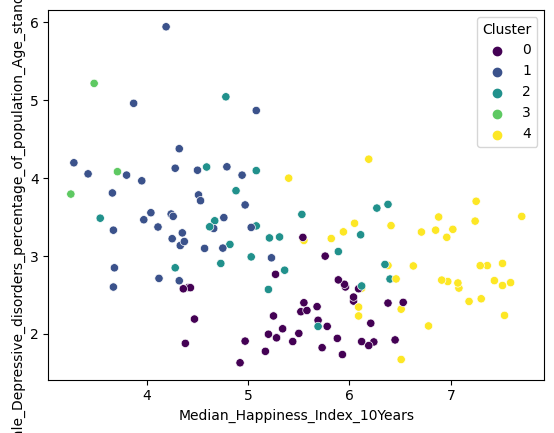

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10)  # Aumentando para 5 clusters e analisando porcentagem masculina x Indice de Felicidade
clusters = kmeans.fit_predict(scaled_data)
results['Cluster'] = clusters

sns.scatterplot(data=results, x='Median_Happiness_Index_10Years', y=
'Male_Depressive_disorders_percentage_of_population_Age_standardized', hue='Cluster', palette='viridis')
plt.show()


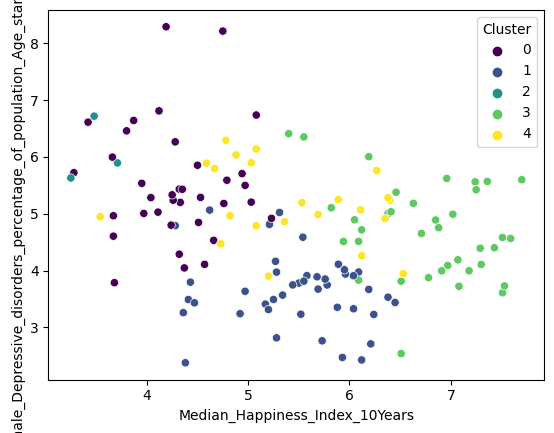

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, n_init=10)  # Aumentando para 5 clusters e analisando porcentagem masculina x Indice de Felicidade
clusters = kmeans.fit_predict(scaled_data)
results['Cluster'] = clusters

sns.scatterplot(data=results, x='Median_Happiness_Index_10Years', y=
'Female_Depressive_disorders_percentage_of_population_Age_standardized', hue='Cluster', palette='viridis')
plt.show()
